## KERAS DL APPLICATION: FINAL PROJECT

In this deep learning project, we will follow this given plan:

* Explaining main objective of the analysis and project focus
* Giving a brief description of the data set
* Implementing Data Exploration, Data Cleaning and Feture Engineering
* Summary of training three variations of the unsupervised model
* Recommending the selected model
* Summary Key Findings and Insights
* Suggestions for next steps

### 1. Main Objective:

In this project we will use the data from kaggle's "30 Days of ML Challenge Competition" and our focus will be on **"deep learning regression"**.

### 2. Brief Description of the Data: 

Data set consist of 10 categorical and 14 numerical columns. Also the target column is numerical:

**Categorical Features:**
- cat0, cat1, cat2: {A,B}
- cat3, cat4, cat5: {A,B,C,D}
- cat6, cat7: {'A', 'B', 'C', 'D', 'E', 'G', 'H', 'I'}
- cat8: {'A', 'B', 'C', 'D', 'E', 'F', 'G'}
- cat9: {'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O'}

**Numerical Features:**
- cont1, cont2, cont3, cont4, cont5, cont6, cont7, cont8, cont9, cont10, cont11, cont12, cont13

As we have 24 attributes, we will reduce the number of features.

### 3. Brief Summary of Data Exploration and Data Cleaning/Feature Engineering:

Before we start EDA, we will import needed packages and load the given data set.

In [4]:
# import
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# load the data
data = pd.read_csv('data_set.csv')

**3a. EDA:**

In [3]:
# dimensions of our dataframe
data.shape

(300000, 26)

In [5]:
data.dtypes

id          int64
cat0       object
cat1       object
cat2       object
cat3       object
cat4       object
cat5       object
cat6       object
cat7       object
cat8       object
cat9       object
cont0     float64
cont1     float64
cont2     float64
cont3     float64
cont4     float64
cont5     float64
cont6     float64
cont7     float64
cont8     float64
cont9     float64
cont10    float64
cont11    float64
cont12    float64
cont13    float64
target    float64
dtype: object

In [6]:
# first 5 rows
data.head()

,id,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,...,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,target
0,1,B,B,B,C,B,B,A,E,C,...,0.400361,0.160266,0.310921,0.389470,0.267559,0.237281,0.377873,0.322401,0.869850,8.113634
1,2,B,B,A,A,B,D,A,F,A,...,0.533087,0.558922,0.516294,0.594928,0.341439,0.906013,0.921701,0.261975,0.465083,8.481233
2,3,A,A,A,C,B,D,A,D,A,...,0.650609,0.375348,0.902567,0.555205,0.843531,0.748809,0.620126,0.541474,0.763846,8.364351
3,4,B,B,A,C,B,D,A,E,C,...,0.668980,0.239061,0.732948,0.679618,0.574844,0.346010,0.714610,0.540150,0.280682,8.049253
4,6,A,A,A,C,B,D,A,E,A,...,0.686964,0.420667,0.648182,0.684501,0.956692,1.000773,0.776742,0.625849,0.250823,7.972260


In [7]:
# brief information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 26 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      300000 non-null  int64  
 1   cat0    300000 non-null  object 
 2   cat1    300000 non-null  object 
 3   cat2    300000 non-null  object 
 4   cat3    300000 non-null  object 
 5   cat4    300000 non-null  object 
 6   cat5    300000 non-null  object 
 7   cat6    300000 non-null  object 
 8   cat7    300000 non-null  object 
 9   cat8    300000 non-null  object 
 10  cat9    300000 non-null  object 
 11  cont0   300000 non-null  float64
 12  cont1   300000 non-null  float64
 13  cont2   300000 non-null  float64
 14  cont3   300000 non-null  float64
 15  cont4   300000 non-null  float64
 16  cont5   300000 non-null  float64
 17  cont6   300000 non-null  float64
 18  cont7   300000 non-null  float64
 19  cont8   300000 non-null  float64
 20  cont9   300000 non-null  float64
 21  cont10  30

In [8]:
# desciption of numeric columns
data.describe().T

,count,mean,std,min,25%,50%,75%,max
id,300000.0,250018.576947,144450.150010,1.000000,124772.500000,250002.500000,375226.500000,499999.000000
cont0,300000.0,0.527335,0.230599,-0.118039,0.405965,0.497053,0.668060,1.058443
cont1,300000.0,0.460926,0.214003,-0.069309,0.310494,0.427903,0.615113,0.887253
cont2,300000.0,0.490498,0.253346,-0.056104,0.300604,0.502462,0.647512,1.034704
cont3,300000.0,0.496689,0.219199,0.130676,0.329783,0.465026,0.664451,1.039560
cont4,300000.0,0.491654,0.240074,0.255908,0.284188,0.390470,0.696599,1.055424
cont5,300000.0,0.510526,0.228232,0.045915,0.354141,0.488865,0.669625,1.067649
cont6,300000.0,0.467476,0.210331,-0.224689,0.342873,0.429383,0.573383,1.111552
cont7,300000.0,0.537119,0.218140,0.203763,0.355825,0.504661,0.703441,1.032837
cont8,300000.0,0.498456,0.239920,-0.260275,0.332486,0.439151,0.606056,1.040229


**3b. Data Cleaning:**

In [9]:
# we check whether data contain any missing value
data.isna().any().any()

False

In [10]:
# we check whether data have any duplication
data.duplicated().any()

False

**3c. Feature Engineering:**

In [11]:
# First of all we seperate features(X) and target(y)

y = data['target']
features = data.drop(['target'], axis=1)

In [ ]:
# Now we will use ordinal encoding for categorical data

In [12]:
# import packages
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split

In [13]:
# List of categorical columns
object_cols = [col for col in features.columns if 'cat' in col]

# ordinal-encode categorical columns
X = features.copy()
ordinal_encoder = OrdinalEncoder()
X[object_cols] = ordinal_encoder.fit_transform(features[object_cols])

# Preview the ordinal-encoded features
X.head()

,id,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,...,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13
0,1,1.0,1.0,1.0,2.0,1.0,1.0,0.0,4.0,2.0,...,0.610706,0.400361,0.160266,0.310921,0.389470,0.267559,0.237281,0.377873,0.322401,0.869850
1,2,1.0,1.0,0.0,0.0,1.0,3.0,0.0,5.0,0.0,...,0.276853,0.533087,0.558922,0.516294,0.594928,0.341439,0.906013,0.921701,0.261975,0.465083
2,3,0.0,0.0,0.0,2.0,1.0,3.0,0.0,3.0,0.0,...,0.285074,0.650609,0.375348,0.902567,0.555205,0.843531,0.748809,0.620126,0.541474,0.763846
3,4,1.0,1.0,0.0,2.0,1.0,3.0,0.0,4.0,2.0,...,0.284667,0.668980,0.239061,0.732948,0.679618,0.574844,0.346010,0.714610,0.540150,0.280682
4,6,0.0,0.0,0.0,2.0,1.0,3.0,0.0,4.0,0.0,...,0.287595,0.686964,0.420667,0.648182,0.684501,0.956692,1.000773,0.776742,0.625849,0.250823


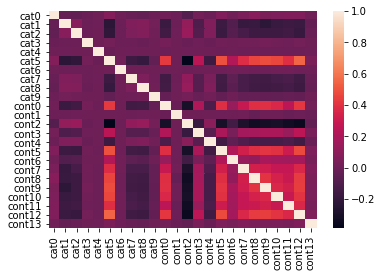

In [14]:
# correlation heatmap of the features
corr = X.drop(columns='id').corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns);

In [15]:
# Next, we break off a validation set from the training data

X_train, X_valid, y_train, y_valid = train_test_split(X, y, random_state=0)

**Dimensionality Reduction:**

In this part of project, we will use three kinds of PCA algorithms with different n_components hyperparameters and we will select the model which gives the smallest MSE value.

In [17]:
# import PCA
from sklearn.decomposition import PCA

In [18]:
# we reduce to 5 components
PCA = PCA(n_components=5)
X_trans_train  = PCA.fit_transform(X_train)
X_trans_valid  = PCA.fit_transform(X_valid)
X_trans_train, X_trans_valid

(array([[-1.62710105e+05,  3.47125498e-01,  3.45962086e+00,
         -1.11418035e+00, -1.96064842e-01],
        [-3.22021052e+04, -6.56009882e-01,  1.73608920e+00,
          6.52318439e-01, -2.26431518e-01],
        [ 8.53798948e+04, -6.67261810e+00,  2.56850193e+00,
          1.95595388e-01,  1.77761934e+00],
        ...,
        [ 4.60438948e+04, -6.66587419e-01,  1.78000997e+00,
          8.73733289e-01, -2.36710842e-01],
        [-3.62710517e+03, -6.00293734e-01, -5.66803140e-01,
         -9.63312625e-01, -1.58890864e-01],
        [ 5.36708948e+04,  3.64929030e-01, -2.14583306e-01,
          1.03994935e+00, -2.30213703e-01]]),
 array([[-6.16176233e+04, -6.62304252e+00, -2.97015503e-01,
         -1.06310502e+00, -2.23864764e-01],
        [-2.16805623e+05, -3.63644906e+00, -2.61839990e-01,
         -1.03709871e+00, -2.18633703e-01],
        [-1.96665623e+05,  7.34085780e+00,  1.86264928e+00,
         -8.67746264e-01, -2.02192944e-01],
        ...,
        [ 4.07263767e+04, -3.5761940

In [27]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_trans_train = scaler.fit_transform(X_trans_train)    
X_trans_valid = scaler.fit_transform(X_trans_valid)

X_trans_train = pd.DataFrame(X_trans_train, columns = ['A', 'B', 'C', 'D', 'E'])
X_trans_valid = pd.DataFrame(X_trans_valid, columns = ['A', 'B', 'C', 'D', 'E'])

### 4. Summary of training three Activation Function:

In [22]:
# import DL libraries

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Activation, Input, Dense, Flatten, Dropout, BatchNormalization
from keras.optimizers import Adam, SGD, RMSprop

#### 4a. Model with 6 Hidden Layer:

In [35]:
# Define the Model 

model_1 = Sequential()
#first hidden layer
model_1.add(Dense(units = 6,  activation='sigmoid', input_dim = 5))
#second hidden layer
model_1.add(Dense(units = 6,  activation='sigmoid', input_dim = 5))
#output layer
model_1.add(Dense(units = 1,  activation='sigmoid'))

# compiling
model_1.compile(optimizer= 'adam', loss= 'binary_crossentropy', metrics = ['accuracy'])

# fitting
model_1.fit(X_trans_train, y_train, batch_size = 10 )

#predict
y_pred_ANN_1 = model_1.predict(X_trans_valid)

22500/22500 [==============================] - 14s 639us/step - loss: -592.3851 - accuracy: 0.0000e+0014s - loss: -20.1334 - accuracy: 0 - ETA: 13s - loss: -43.0568 - ac - ETA: 12s - loss - ETA: 8s - loss: - - ETA: 7s - loss: -309.3697 - accuracy: 0.00 - ETA: 6s - loss: -


In [51]:
#performance evaluation

from sklearn.metrics import median_absolute_error

median_absolute_error(y_valid, y_pred_ANN_1)

7.191170891367855

#### 4b. Model with 8 Hidden Layer:

In [40]:
# Define the Model 

model_2 = Sequential()
#first hidden layer
model_2.add(Dense(units = 8,  activation='sigmoid', input_dim = 5))
#second hidden layer
model_2.add(Dense(units = 8,  activation='sigmoid', input_dim = 5))
#output layer
model_2.add(Dense(units = 1,  activation='sigmoid'))

# compiling
model_2.compile(optimizer= 'adam', loss= 'binary_crossentropy', metrics = ['accuracy'])

# fitting
model_2.fit(X_trans_train, y_train, batch_size = 10 )

#predict
y_pred_ANN_2 = model_2.predict(X_trans_valid)

22500/22500 [==============================] - 14s 643us/step - loss: -714.0081 - accuracy: 0.0000e+008s - loss: -264 - ETA: 7s -  - ETA: 5s - loss: -427.5361 - accuracy: 0. - ETA: 5s - loss: -448.0819 - accu - ETA: 4s - loss: -490.1266 - accuracy: 0.0 - ETA: 1s - loss: -64


In [54]:
#performance evaluation

from sklearn.metrics import median_absolute_error

mean_absolute_error(y_valid, y_pred_ANN_2)

7.239457593409309

#### 4c. Model with 10 Hidden Layer:

In [52]:
# Define the Model 

model_3 = Sequential()
#first hidden layer
model_3.add(Dense(units = 10,  activation='sigmoid', input_dim = 5))
#second hidden layer
model_3.add(Dense(units = 10,  activation='sigmoid', input_dim = 5))
#output layer
model_3.add(Dense(units = 1,  activation='sigmoid'))

# compiling
model_3.compile(optimizer= 'adam', loss= 'binary_crossentropy', metrics = ['accuracy'])

# fitting
model_3.fit(X_trans_train, y_train, batch_size = 10 )

#predict
y_pred_ANN_3 = model_3.predict(X_trans_valid)

22500/22500 [==============================] - 15s 669us/step - loss: -911.2892 - accuracy: 0.0000e+00


In [53]:
#performance evaluation

from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_valid, y_pred_ANN_3)

7.239457593409309

### 5. Recommended Model:

When we look at the MAE values, we can see that the model with 6 hidden layer is best model.

### 6. Key Findings and Insights:

According to the findings of this project 6-layer model gives the best result, whereas 8-layer and 10-layer models give worse scores.

### 7. Suggestions for Next Steps:

For next steps of this project, different keras models can be used.